In [1]:
%pylab inline

from letterDist.helpers import (make_letter_dict, load_all_words,
                                get_letter_dists, plot_letter_dists, 
                                plot_just_k,
                                letter_dist_heatmap, points_legend, 
                                plot_letter_dists_scrabble,
                                plot_letter_volume_scrabble)

Populating the interactive namespace from numpy and matplotlib


It's been a busy couple of months.

I'm working in a software engineer-ier capacity these days, building out a Sphinx-based documentation platform, standing up a Package Index for library code we've been brewing, and doing all kinds of internal writing about standards and best practices. Job title still says "Senior Data Analyst," but I've been signing emails as [developer advocate](https://medium.com/@ashleymcnamara/what-is-developer-advocacy-3a92442b627c)-- an excellent characterization of what I've been up to these past couple years. It's been slow-going and frankly a bit taxing, but I'm optimistic that it'll translate into my doing some quality data science once things are platformed a bit better.

Of course, since I'm learning a whole lot during the day, my *constructive* extracurricular work has fallen to the wayside. And in turn my decompress hobbies have picked up in a big way. Since the middle of June, I've burned through:

- Mario Rabbids for the Switch: Weird and fantastic
- All 100-something Marvel Civil War comics and many others: Turns out comics are pretty cool. Who knew?
- Bloodborne on the PS4: It took three, multiple-month quits before I finally got gud.
- A good deal of skin: I've still got signs of the sunburn I got beginning of the month, lol

And last, but not least, my good friend Will recommended that I check out Daniel Kahneman's *Thinking Fast and Slow*. We've compared notes over the past few years on all things mental health, imposter syndrome, and Internet garbage. He was instrumental in helping me get a standup routine together that seemed to go over well-enough, and we're often thinking on the same wavelength. So when he made a book recommendation, I was certain that it would be a quality one.

Nevertheless, I didn't even make it through the introduction before I found myself itching to do some tinkering over a couple sentences that I read, lol

## The Question

The book itself explores thinking and decision making-- establishing some simple constructions that help you conceptualize the way your brain works. It also provides insight into how that may occasionally work against us in the form of biases, and *for* us via *heuristics* (or roughly, rules of thumb).

And so while explaining the *availability heuristic*, or our tendency to form opinions based on the examples we can easily summon, he says the following:

> Consider the letter *K*.
>
> Is *K* more likely more likely to appear as the first letter in a word OR as the third letter?

And I stopped and went through the mental exercise.

    cake, lick, kangaroo, clock, acknowledge, knowledge, know, knack, kick, ...
    
It *seemed* about even, but I was very aware that for every first-letter-k I was coming up with, I was deliberately suppressing another one while I thought even harder for a third-letter-k, in some clumsy balancing strategy. Then all of a sudden, I was in my head about it, and the reflexive, "ease of access" point he was trying to impart was wasted on me.

Be that as it may, what was the answer?

### My Approach

Basically, the mental-model I was starting to think up looked like the following:

I was going to have a big old list of every letter, where each letter had its own corresponding (empty at first) list.

In [2]:
letters = make_letter_dict()
print(letters)

{'a': {}, 'b': {}, 'c': {}, 'd': {}, 'e': {}, 'f': {}, 'g': {}, 'h': {}, 'i': {}, 'j': {}, 'k': {}, 'l': {}, 'm': {}, 'n': {}, 'o': {}, 'p': {}, 'q': {}, 'r': {}, 's': {}, 't': {}, 'u': {}, 'v': {}, 'w': {}, 'x': {}, 'y': {}, 'z': {}}


And I'd be able to take a word, and see where each letter fell (first, second, etc)

In [3]:
for idx, letter in enumerate('kickback'):
    print(idx, letter)

0 k
1 i
2 c
3 k
4 b
5 a
6 c
7 k


Then I'd be able to populate those sub-lists, per letter, with a count of where letters have occurred.

For example, here, `k` occurs once in the `0th`, `3rd`, and `7th` places.

In [4]:
print(get_letter_dists(['kickback'])['k'])

{0: 1, 3: 1, 7: 1}


And so as I layered in more words, I'd be able to get a running total of counts, per letter, of where they appeared in my list of words.

In [5]:
print(get_letter_dists(['kickback', 'knock', 'knuckle'])['k'])

{0: 3, 3: 1, 7: 1, 4: 2}


But to extend this idea to the point where I can make real inference, I was going to need a ridiculous amount of data.

### A Ridiculous Amount of Data

So I found myself borrowing from the `popular.txt` by [GitHub user Dolph](https://github.com/dolph/dictionary#populartxt), which is a combination of the very-famous [Enable 1](http://www.bananagrammer.com/2013/12/the-amazing-enable-word-list-project.html) dataset, cross-referenced against Wiktionary's word frequency lists generated from a comprehensive look at scripts from English-speaking TV shows and movies.

In [6]:
words = load_all_words()

It's over 25,000 words long.

In [7]:
len(words)

25322

It includes words spoken by the everyman, you and me.

In [8]:
print('dog' in words)
print('beer' in words)
print('data' in words)
print('science' in words)

True
True
True
True


But doesn't include $2 words of high-society.

In [9]:
print('tophat' in words)
print('wainscoting' in words)
print('bourgeoisie' in words)
print('universalhealthcare' in words)

False
False
False
False


As well as just about all of the good swear words (left as an exercise to the reader).

## Running It

I ran the same "letters by count in words" across this whole dataset, this time, opting to store it in a more-easily-readible tabular format.

In [10]:
df = get_letter_dists(words, asFrame=True)
df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1405.0,1566.0,2533.0,1595.0,988.0,1198.0,825.0,1036.0,915.0,250.0,...,92.0,1442.0,3135.0,1323.0,499.0,377.0,728.0,1.0,98.0,44.0
1,3554.0,150.0,438.0,202.0,3739.0,91.0,83.0,1040.0,2577.0,4.0,...,64.0,2227.0,220.0,624.0,1914.0,182.0,208.0,282.0,238.0,1.0
2,2368.0,518.0,1223.0,793.0,1784.0,460.0,703.0,205.0,1618.0,70.0,...,51.0,2364.0,1737.0,1645.0,1006.0,469.0,257.0,127.0,259.0,93.0
3,1506.0,442.0,1139.0,1007.0,3003.0,429.0,776.0,558.0,1937.0,39.0,...,46.0,1618.0,1473.0,2138.0,762.0,338.0,258.0,32.0,192.0,112.0
4,1371.0,317.0,729.0,702.0,3565.0,206.0,477.0,699.0,2296.0,7.0,...,15.0,1708.0,1706.0,1611.0,705.0,158.0,147.0,22.0,498.0,65.0
5,1285.0,207.0,640.0,956.0,2761.0,212.0,477.0,419.0,1976.0,3.0,...,18.0,1725.0,1660.0,1484.0,433.0,200.0,147.0,23.0,474.0,31.0
6,1112.0,117.0,428.0,813.0,2081.0,69.0,762.0,207.0,1545.0,3.0,...,3.0,1065.0,1613.0,1440.0,335.0,82.0,45.0,22.0,340.0,53.0
7,604.0,85.0,331.0,656.0,1514.0,44.0,713.0,137.0,1067.0,2.0,...,1.0,641.0,1188.0,995.0,197.0,79.0,43.0,6.0,261.0,57.0
8,379.0,54.0,178.0,482.0,1087.0,18.0,461.0,89.0,651.0,0.0,...,3.0,339.0,793.0,638.0,113.0,63.0,12.0,3.0,220.0,32.0
9,164.0,31.0,112.0,290.0,595.0,6.0,306.0,68.0,344.0,0.0,...,0.0,188.0,493.0,414.0,52.0,34.0,1.0,3.0,190.0,19.0


Idea to execution, procuring and wrangling this dataset was actually much easier than I'd originally thought.

The real fun was trying to figure out compelling visualizations.

## Visualizing It

Admittedly, my `matplotlib` chops have always been "good enough to get the job done" but have always taken a back seat to some of the meatier Python topics. (And we're not going to talk about the D3 book collecting dust on my book shelf :( )

I had a lot of thoughts about what some nice visualizations might look like, doodling and shopping ideas from friends who are better at this stuff than me (Here's where I'd love to link the blog you should write. You know who you are!). But as I started hurling spaghetti code at my interpreter, it soon became clear that I'd be doing myself a lot of favors if I started peeling back the curtain on `matplotlib` a little bit. It wound up being a good an excuse as any to start padding out the [Data Viz section of my notes](https://napsterinblue.github.io/notes/#python)-- explaining things I've probably Googled dozens of times. 

Ultimately, I had a lot of fun deciding what a visualization was **going** to look like, then figuring out how to leverage the expressive API to make that happen.

Here are some of my favorites:

### The Meat of the Post

First, I tried taking a look at how these counts measured up, per letter, *as a percentage of that letter's overall counts*. It's clear here that `k` shows up as the `4th` far more than the first or third spot (sorry, folks not used to 0-indexing!).

I wound up leveraging the `seaborn` library to organize the plot, and in so doing stumbled across a [fascinating talk on how the devs picked this color gradient](https://www.youtube.com/watch?v=xAoljeRJ3lU).

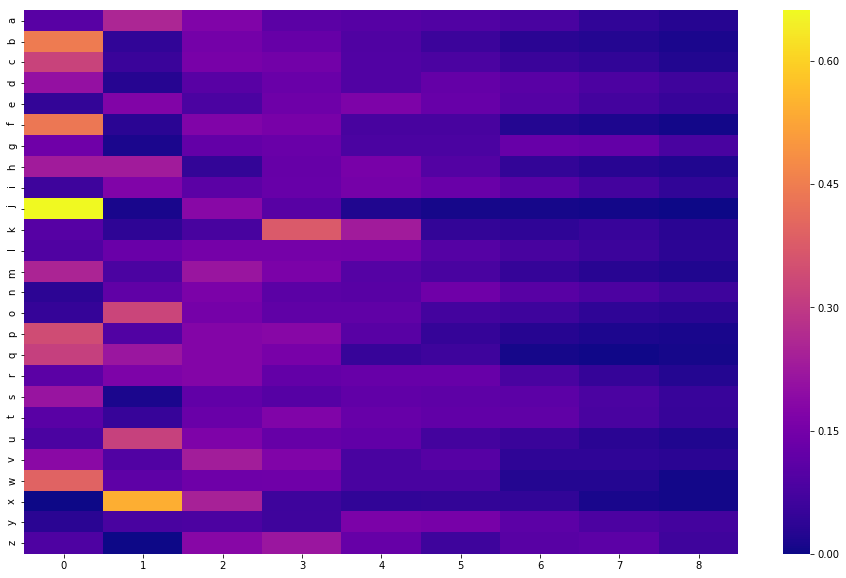

In [11]:
letter_dist_heatmap(df)

But this was almost too close to tell, depending on how well you can interpret differences in hue.

Instead, I went with a more traditional approach and did a bunch of bar charts, and it helps you get a better idea of the how the letters are distributed. `k` still looks pretty close.

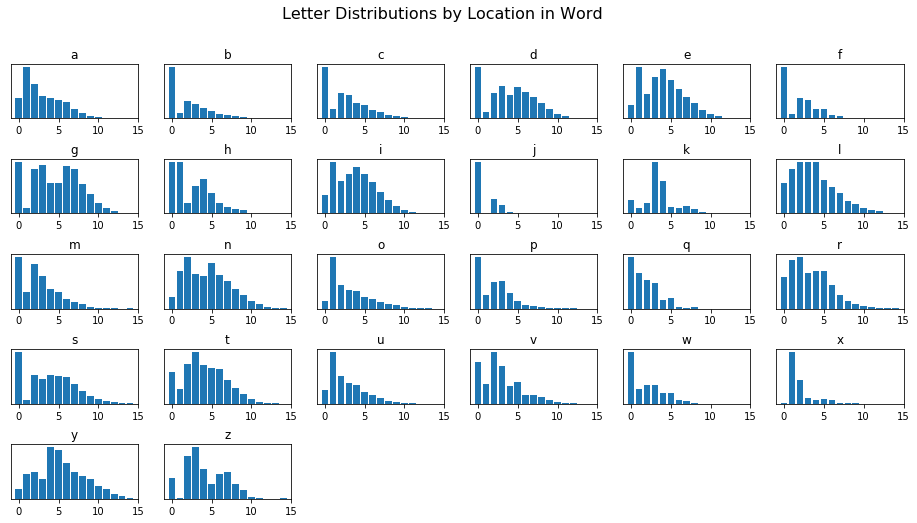

In [12]:
plot_letter_dists(df)

But a closer inspection of the `k` chart reveals that the first letter does, indeed, occur more often than the third.

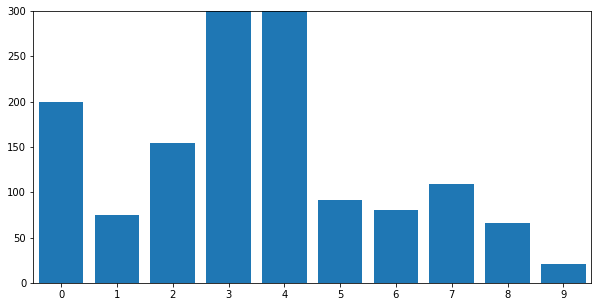

In [13]:
plot_just_k(df)

Look out for my unofficial sequel, *Thinking Fast and then Tinkering at Your Computer for a Couple Nights*

## Bonus Scrabble Round

Before I closed the lid on my tinkering, I was struck by some of the distributions of the letters that I'd found. `j` was overwhelmingly the first letter. `o` and `u` the second. Many others followed an almost-normal distribution.

So I did what you'd expect of any data scientist who'd gotten destroyed in Scrabble the night before, and I reworked the visualization to also include point values of each letter. Study your losses, right?

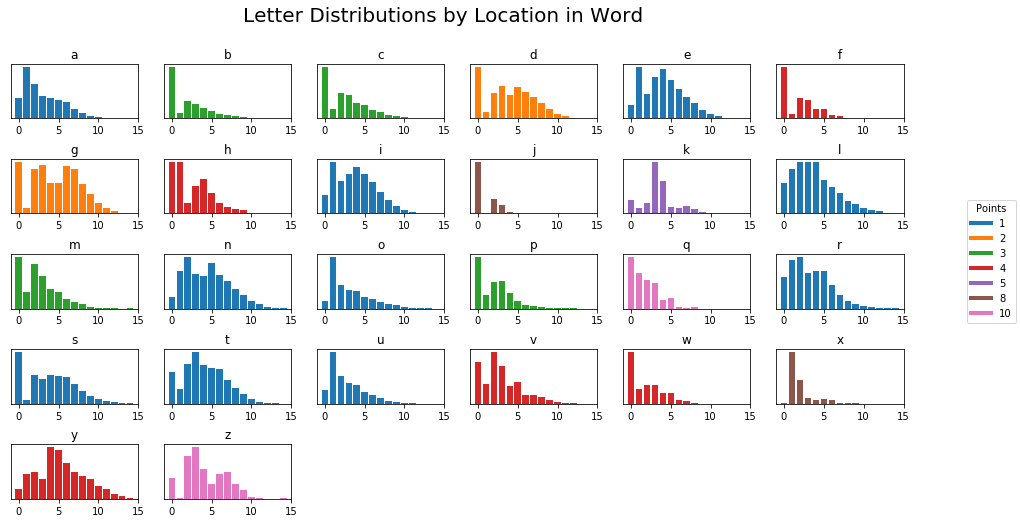

In [14]:
plot_letter_dists_scrabble(df)

I thought it was interesting to see that vowels earn their one-point-edness and by having a pretty wide distribution, making them flexible tiles. But you might also notice that all of the two and three point consonants share a pretty handy availability as more-often the first letter in a word, making it much easier to play onto an uncrowded board. Conversely, you'll have to scratch your head a bit to make a quality play with `z`.

Alternatively, you might also just look at how prevalent these letters were across our text and find a much simpler interpretation.

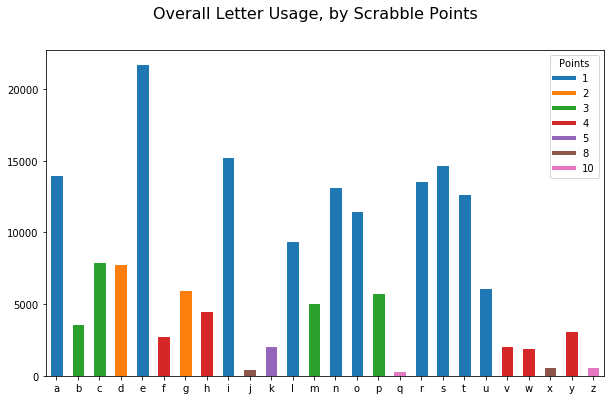

In [15]:
plot_letter_volume_scrabble(df)

## Conclusion

Thanks for reading! Per usual, the code I used to generate all of the above [can be found here](https://github.com/NapsterInBlue/LetterDistributions). I'm gonna go get back to that book.

Cheers,

-Nick